# Alex Asiimwe JAN21/MCOMP/275U

SOFTWARE MODELLING AND DESIGN EXAM

# Africa_Covid Dataset

In [20]:

import os, types
import pandas as pd
from botocore.client import Config
import ibm_boto3

def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share the notebook.

if os.environ.get('RUNTIME_ENV_LOCATION_TYPE') == 'external':
    endpoint_74bdbd59b0ba4c2f99d73acb3bd969c3 = 'https://s3.eu-geo.objectstorage.softlayer.net'
else:
    endpoint_74bdbd59b0ba4c2f99d73acb3bd969c3 = 'https://s3.eu-geo.objectstorage.service.networklayer.com'

client_74bdbd59b0ba4c2f99d73acb3bd969c3 = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='9jhLiwD092T4DUEtDBTiEz_eJqBXkIEjx5512aKPylsi',
    ibm_auth_endpoint="https://iam.cloud.ibm.com/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url=endpoint_74bdbd59b0ba4c2f99d73acb3bd969c3)

body = client_74bdbd59b0ba4c2f99d73acb3bd969c3.get_object(Bucket='simulation-donotdelete-pr-g1l8hrfwognxza',Key='Africa_Covid.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

df = pd.read_csv(body)
df.head()


,Name,Cases_cumulative tota,Cases _newly reported in last 7 days,Cases _newly reported in last 24 hours,Deaths _cumulative total
0,South Africa,1369426,91123,12710,38854
1,Ethiopia,132034,2589,307,2044
2,Nigeria,114691,10692,1386,1478
3,Algeria,104606,1965,265,2854
4,Kenya,99444,889,136,1736


Exploring the dataset and checking the records at the top and bottom of the dataset

In [21]:
df.tail()

,Name,Cases_cumulative tota,Cases _newly reported in last 7 days,Cases _newly reported in last 24 hours,Deaths _cumulative total
45,Sao Tome and Principe,1170,65,19,17
46,Seychelles,844,234,82,3
47,Mauritius,556,10,0,10
48,United Republic of Tanzania,509,0,0,21
49,Saint Helena,0,0,0,0


In [22]:
df.describe()

,Cases_cumulative tota,Cases _newly reported in last 7 days,Cases _newly reported in last 24 hours,Deaths _cumulative total
count,5.000000e+01,50.000000,50.000000,50.000000
mean,4.790520e+04,3157.600000,444.460000,1112.880000
std,1.930793e+05,12891.920436,1802.809873,5474.797223
min,0.000000e+00,0.000000,0.000000,0.000000
25%,3.627000e+03,171.250000,5.250000,63.000000
50%,9.852000e+03,567.500000,66.000000,119.000000
75%,2.510825e+04,1753.750000,241.000000,391.000000
max,1.369426e+06,91123.000000,12710.000000,38854.000000


checking for null values in the dataset. There are no null values.

In [23]:
df.isnull().sum()

Name                                      0
Cases_cumulative tota                     0
Cases _newly reported in last 7 days      0
Cases _newly reported in last 24 hours    0
Deaths _cumulative total                  0
dtype: int64

create a subdataset the can be used to check for the min, max, mean and standard deviation for Death _cumulative and also display the country

In [24]:
df1= df[['Name', 'Deaths _cumulative total']]

getting the minimum death cummulative total and the corresponding country

In [25]:
df1.min()

Name                        Algeria
Deaths _cumulative total          0
dtype: object

getting the maximum death cumulative total and the coressponding country

In [26]:
df1.max()

Name                        Zimbabwe
Deaths _cumulative total       38854
dtype: object

calculating the mean for death cumulative total

In [27]:
df1['Deaths _cumulative total'].mean()

1112.88

calculating the standard deviation for the death cumulative total

In [28]:
df1['Deaths _cumulative total'].std()

5474.797223493063

# Simple Linear Regression 

seperate the dataset into feature and target sub datasets 

In [29]:
x=df[['Cases_cumulative tota']]
y=df[['Deaths _cumulative total']]

import the standard scaler and scale the feature and target 

In [30]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x=scaler.fit_transform(x)
y=scaler.fit_transform(y)

import the train_test_split function from the model_selection module split the sub datsets into the training data and testing data(cross validation)

In [31]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state =4)

import the model, instantiate it and train it on the traing data

In [32]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression().fit(x_train, y_train)

In [33]:
from sklearn.metrics import mean_squared_error, r2_score,mean_absolute_error, accuracy_score, classification_report, confusion_matrix, f1_score
reg.score(x_train, y_train)

0.9950509490064218

use the model to predict the target values agaist the x_test features.

In [34]:
y_pred= reg.predict(x_test)

In [35]:
reg.score(x_test, y_pred)

1.0

In [36]:
reg.intercept_

array([0.00585624])

In [37]:
reg.coef_

array([[0.99813511]])

# The model is:  Deaths _cumulative total = 0.99813511(Cases_cumulative tota) + 0.00585624

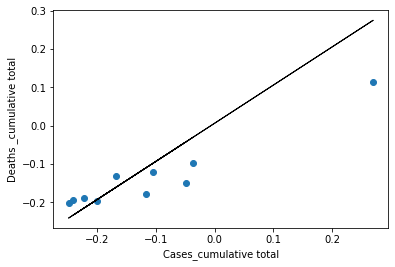

In [38]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.scatter(x_test, y_test)
plt.plot(x_test, y_pred, color='black', linewidth=1)
plt.xlabel('Cases_cumulative total')
plt.ylabel('Deaths _cumulative total')
plt.show()

calculated the R-square

In [39]:
R_squared = r2_score(y_pred,y_test)
print(R_squared)

0.7585019728352972


calculated the Root mean Square

In [40]:
import numpy as np
RMSE = np.sqrt(mean_squared_error(y_pred, y_test))
print(RMSE)

0.0716758670078965


calculated the Mean absolute error

In [41]:
MAE = mean_absolute_error(y_pred, y_test)
print(MAE)

0.056327900304684875


From the value of R-square of 0.7585, 76% of dependent variability can be explain by the simple linear model,
the Root mean squared error RMSE of 0.0716 tells us that the model fits the data and it can relatively predict the data accurately.
The Nean absolute error of 0.056 tells us that the error bewteen the true values and the predicted values id 5.6% making the model very accurate.

# 

# Multiple Linear Regression

multiple features are used to make a prdiction. the dataset is devided into a set of features(xm) and the the target (ym)

In [42]:
xm = df[['Cases_cumulative tota', 'Cases _newly reported in last 7 days', 'Cases _newly reported in last 24 hours']]
ym = df[['Deaths _cumulative total']]

perform feature scalling on the features and the target

In [43]:
scaler = StandardScaler()
xm=scaler.fit_transform(xm)
ym=scaler.fit_transform(ym)

use the train_test_split function to splint the xm and ym into the training and testing data

In [44]:
xm_train, xm_test, ym_train, ym_test = train_test_split(xm, ym, test_size = 0.2, random_state =4)

instanciate the model and fit it with the training data

In [45]:
mreg = LinearRegression(normalize=True).fit(xm_train, ym_train)

In [46]:
mreg.score(xm_train, ym_train)

0.9952709192213736

use the model to make predictions 

In [47]:
ym_pred= mreg.predict(xm_test)

In [48]:
 mreg.score(xm_test, ym_pred)

1.0

get respective coeficients 

In [49]:
mreg.coef_

array([[0.88071071, 0.10040203, 0.01840039]])

get the intercept

In [50]:
mreg.intercept_

array([0.00515578])


# The model is; Deaths _cumulative total = 0.88071071(Cases_cumulative tota)+ 0.10040203(Cases _newly reported in last 7 days)+0.01840039(Cases _newly reported in last 24 hours)

calculate the R-squared

In [51]:
R_squared = r2_score(ym_pred,ym_test)
print(R_squared)

0.7547714368543206


calculate the Root Mean suqared error

In [52]:
RMSE = np.sqrt(mean_squared_error(ym_pred, ym_test))
print(RMSE)

0.06809962683478475


calculate the Mean Absolute error

In [53]:
MAE = mean_absolute_error(ym_pred, ym_test)
print(MAE)

0.054901473257761256


From the value of R-square of 0.75.5, 75% of dependent variability can be explain by the Multiple linear model, 
the Root mean squared error RMSE of 0.0681 tele data and it can relvely predict the datiata accurately. 
The Nean absolute error of 0.0549 tells us that the error bewteen the true values and the predicted values id 5.4% making the model very accurate.

# 

# 

# WHO_Covid_19_Jan22_2021 Dataset

In [66]:

body = client_74bdbd59b0ba4c2f99d73acb3bd969c3.get_object(Bucket='simulation-donotdelete-pr-g1l8hrfwognxza',Key='WHO_Covid_19_Jan22_2021.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

data = pd.read_csv(body)
data.head()


,Name,WHO Region,Cases _cumulative total,Cases _cumulative total per 1 million population,Cases _newly reported in last 7 days,Cases _newly reported in last 24 hours,Deaths _cumulative total,Deaths_ cumulative total per 1 million population,Deaths _newly reported in last 7 days,Deaths _newly reported in last 24 hours,Transmission Classification
0,South Africa,Africa,1369426,23089.80,91123,12710,38854,655.11,3714,566,Community transmission
1,Ethiopia,Africa,132034,1148.49,2589,307,2044,17.78,38,7,Community transmission
2,Nigeria,Africa,114691,556.38,10692,1386,1478,7.17,96,14,Community transmission
3,Algeria,Africa,104606,2385.48,1965,265,2854,65.08,38,6,Community transmission
4,Kenya,Africa,99444,1849.39,889,136,1736,32.28,16,2,Community transmission


In [67]:
data.tail()

,Name,WHO Region,Cases _cumulative total,Cases _cumulative total per 1 million population,Cases _newly reported in last 7 days,Cases _newly reported in last 24 hours,Deaths _cumulative total,Deaths_ cumulative total per 1 million population,Deaths _newly reported in last 7 days,Deaths _newly reported in last 24 hours,Transmission Classification
233,Pitcairn Islands,Western Pacific,0,0.00000,0,0,0,0.000000,0,0,No cases
234,Tokelau,Western Pacific,0,0.00000,0,0,0,0.000000,0,0,No cases
235,Tonga,Western Pacific,0,0.00000,0,0,0,0.000000,0,0,No cases
236,Tuvalu,Western Pacific,0,0.00000,0,0,0,0.000000,0,0,No cases
237,Global,NaN,96012792,12299.38138,4438467,653081,2075870,265.922033,94619,16943,NaN


In [68]:
data = data.drop([data.index[237]])

In [69]:
data.tail()

,Name,WHO Region,Cases _cumulative total,Cases _cumulative total per 1 million population,Cases _newly reported in last 7 days,Cases _newly reported in last 24 hours,Deaths _cumulative total,Deaths_ cumulative total per 1 million population,Deaths _newly reported in last 7 days,Deaths _newly reported in last 24 hours,Transmission Classification
232,Palau,Western Pacific,0,0.0,0,0,0,0.0,0,0,No cases
233,Pitcairn Islands,Western Pacific,0,0.0,0,0,0,0.0,0,0,No cases
234,Tokelau,Western Pacific,0,0.0,0,0,0,0.0,0,0,No cases
235,Tonga,Western Pacific,0,0.0,0,0,0,0.0,0,0,No cases
236,Tuvalu,Western Pacific,0,0.0,0,0,0,0.0,0,0,No cases


In [70]:
data.describe()

,Cases _cumulative total,Cases _cumulative total per 1 million population,Cases _newly reported in last 7 days,Cases _newly reported in last 24 hours,Deaths _cumulative total,Deaths_ cumulative total per 1 million population,Deaths _newly reported in last 7 days,Deaths _newly reported in last 24 hours
count,2.370000e+02,236.000000,2.370000e+02,237.000000,237.000000,236.000000,237.000000,237.000000
mean,4.051173e+05,18141.275805,1.872771e+04,2755.616034,8758.945148,304.733814,399.236287,71.489451
std,1.859550e+06,22844.044259,9.596834e+04,13581.629325,34575.582521,422.060472,1726.337422,346.124532
min,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.358000e+03,956.215000,4.000000e+01,0.000000,17.000000,8.835000,0.000000,0.000000
50%,1.628000e+04,7810.865000,6.680000e+02,80.000000,271.000000,85.490000,9.000000,0.000000
75%,1.734700e+05,30165.987500,5.776000e+03,848.000000,2956.000000,482.055000,105.000000,15.000000
max,2.422516e+07,120468.520000,1.353825e+06,187919.000000,402803.000000,1915.260000,21281.000000,4368.000000


In [71]:
data.isnull().sum()

Name                                                 0
WHO Region                                           0
Cases _cumulative total                              0
Cases _cumulative total per 1 million population     1
Cases _newly reported in last 7 days                 0
Cases _newly reported in last 24 hours               0
Deaths _cumulative total                             0
Deaths_ cumulative total per 1 million population    1
Deaths _newly reported in last 7 days                0
Deaths _newly reported in last 24 hours              0
Transmission Classification                          0
dtype: int64

In [72]:
data.corr()

,Cases _cumulative total,Cases _cumulative total per 1 million population,Cases _newly reported in last 7 days,Cases _newly reported in last 24 hours,Deaths _cumulative total,Deaths_ cumulative total per 1 million population,Deaths _newly reported in last 7 days,Deaths _newly reported in last 24 hours
Cases _cumulative total,1.000000,0.221960,0.942199,0.944822,0.956015,0.274937,0.877740,0.872869
Cases _cumulative total per 1 million population,0.221960,1.000000,0.244065,0.248366,0.228036,0.826691,0.240268,0.224339
Cases _newly reported in last 7 days,0.942199,0.244065,1.000000,0.996369,0.919740,0.293087,0.942673,0.944196
Cases _newly reported in last 24 hours,0.944822,0.248366,0.996369,1.000000,0.932971,0.302509,0.949655,0.949176
Deaths _cumulative total,0.956015,0.228036,0.919740,0.932971,1.000000,0.356342,0.926366,0.916863
Deaths_ cumulative total per 1 million population,0.274937,0.826691,0.293087,0.302509,0.356342,1.000000,0.351303,0.326048
Deaths _newly reported in last 7 days,0.877740,0.240268,0.942673,0.949655,0.926366,0.351303,1.000000,0.995479
Deaths _newly reported in last 24 hours,0.872869,0.224339,0.944196,0.949176,0.916863,0.326048,0.995479,1.000000


In [73]:
xt = data[['Cases _cumulative total','Cases _newly reported in last 7 days', 'Deaths _cumulative total', 'Deaths _newly reported in last 7 days', 'Deaths _newly reported in last 24 hours']]
yt = data[['Transmission Classification']]

In [74]:
scaler = StandardScaler()
scaler.fit(xt)
xt=scaler.transform(xt)

In [75]:
xt_train, xt_test, yt_train, yt_test = train_test_split(xt, yt, test_size=0.20, random_state = 4)

In [76]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(criterion = "gini", random_state = 4, max_depth=3, min_samples_leaf=3).fit(xt_train, yt_train)

In [77]:
clf.score(xt_train, yt_train)

0.7354497354497355

In [78]:
yt_pred = clf.predict(xt_test)

In [79]:
clf.score(xt_test, yt_pred)

1.0

In [80]:
accuracy_score(yt_test, yt_pred)

0.7291666666666666

In [81]:
print(classification_report(yt_pred,yt_test))

                        precision    recall  f1-score   support

     Clusters of cases       0.00      0.00      0.00         1
Community transmission       0.97      0.76      0.85        38
              No cases       0.50      1.00      0.67         2
               Pending       0.00      0.00      0.00         0
        Sporadic cases       0.44      0.57      0.50         7

              accuracy                           0.73        48
             macro avg       0.38      0.47      0.40        48
          weighted avg       0.85      0.73      0.78        48



/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [89]:
print(confusion_matrix(yt_pred, yt_test))

[[ 0  0  0  0  1]
 [ 4 29  1  0  4]
 [ 0  0  2  0  0]
 [ 0  0  0  0  0]
 [ 0  1  1  1  4]]


In [90]:
!pip install graphviz

/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/secretstorage/dhcrypto.py:16: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes
/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/secretstorage/util.py:25: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes


In [91]:
!pip install pydotplus

/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/secretstorage/dhcrypto.py:16: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes
/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/secretstorage/util.py:25: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes


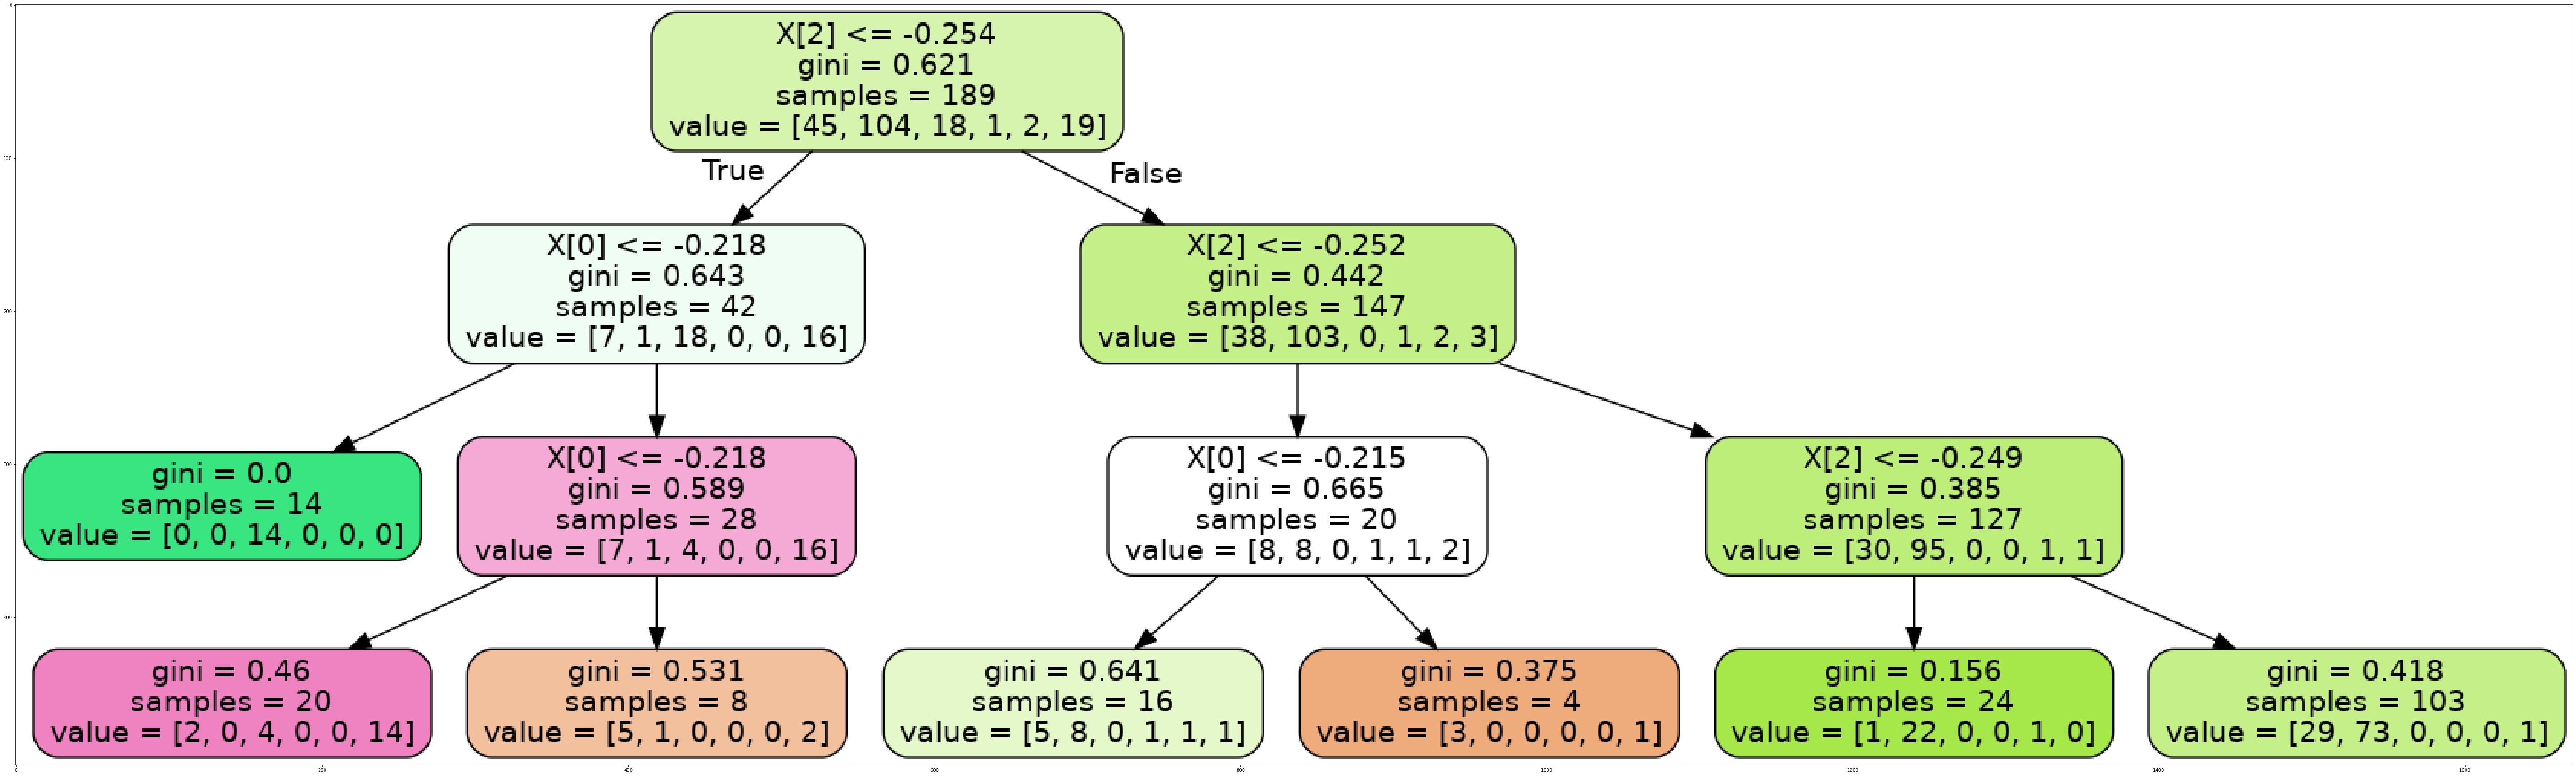

In [92]:
from sklearn import tree
from six import StringIO
import graphviz
import pydotplus
import matplotlib.image as mpimg
import matplotlib.pyplot as plt

dot_data = StringIO()
tree.export_graphviz(clf, out_file=dot_data,filled=True,rounded=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png('mytree.png')
img=mpimg.imread('mytree.png')
plt.figure(figsize=(100,200))
imgplot = plt.imshow(img)
plt.show()

# 

In conclusion the multiple linear model fits the data more than the simple linear regression. 
visualisation of the model was added for the simple linear regression model and also calculate 
the Mean Absolute error the double check the accuracy without considering the direction.
using the F1 score under the classification report, the community transmission is the highest 
and responsible for 85% of all transmissions

challenges:
    * loading data into the IBM platform eas a challenge as it raised an encoding error.
    * the WHO dataset had null values that I could not drop.
    * Failed to visualise multiple lineear regression.
    * there were columns with outliers.
    * drawing the tree was very hard
    
Contributuions:
    * scalled the data to improve perfonance.
    * visualized the simple linear regressior.
    * added a confussion matrix to help fully understand the performance of the tree.
    * tapped into the available arguments for the respective models to improve perfornance.
    